In [46]:
 import pandas as pd
 import numpy as np
 import seaborn as sns
 from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder
 from sklearn.model_selection import train_test_split
 from sklearn.linear_model import LogisticRegression
 from sklearn.metrics import accuracy_score

In [2]:
DF = pd.read_csv('/content/sample_data/Social_Network_Ads - na.csv')
DF

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,NaN,43000.0,0
3,15603246,Female,27.0,NaN,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [3]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              399 non-null    float64
 3   EstimatedSalary  399 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [4]:
DF['Age'] = round(DF['Age'].fillna(DF['Age'].mean()))
DF.dropna(inplace=True)
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          399 non-null    int64  
 1   Gender           399 non-null    object 
 2   Age              399 non-null    float64
 3   EstimatedSalary  399 non-null    float64
 4   Purchased        399 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 18.7+ KB


In [5]:
DF['EstimatedSalary'] = round(DF['EstimatedSalary'].fillna(0))

In [6]:
DF['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [7]:
DF.nunique() # Mencari jumlah tiap jenis data

User ID            399
Gender               2
Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64

In [8]:
DF.groupby('Gender')['User ID'].count()

Gender
Female    203
Male      196
Name: User ID, dtype: int64

In [9]:
DF.groupby('Gender').count()

,User ID,Age,EstimatedSalary,Purchased
Gender,,,,
Female,203,203,203,203
Male,196,196,196,196


In [10]:
DF['Gender'] = DF['Gender'].replace({'Male':1, "Female":0})

In [11]:
DF["rasio_age_salary"] = DF['Gender'] / DF['EstimatedSalary']
DF

,User ID,Gender,Age,EstimatedSalary,Purchased,rasio_age_salary
0,15624510,1,19.0,19000.0,0,0.000053
1,15810944,1,35.0,20000.0,0,0.000050
2,15668575,0,38.0,43000.0,0,0.000000
4,15804002,1,19.0,76000.0,0,0.000013
5,15728773,1,27.0,58000.0,0,0.000017
...,...,...,...,...,...,...
395,15691863,0,46.0,41000.0,1,0.000000
396,15706071,1,51.0,23000.0,1,0.000043
397,15654296,0,50.0,20000.0,1,0.000000
398,15755018,1,36.0,33000.0,0,0.000030


In [12]:
DF.drop(labels=['User ID', 'rasio_age_salary'], axis=1, inplace=True)

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Purchased'}>]], dtype=object)

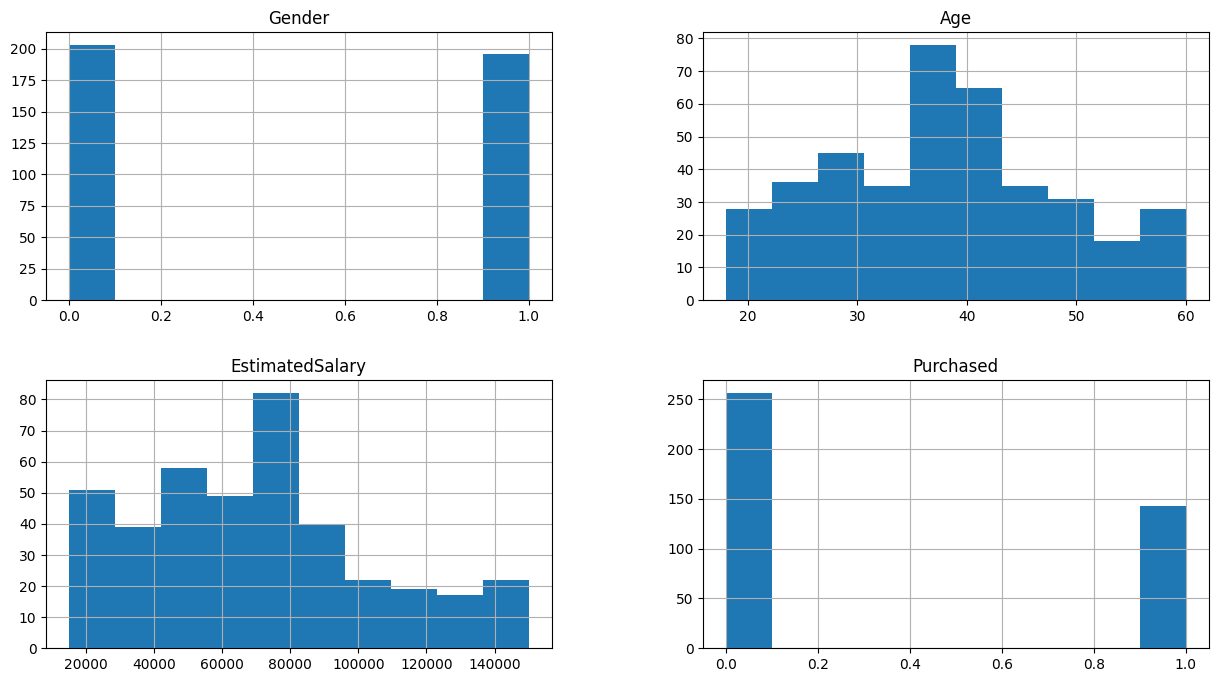

In [13]:
DF.hist(figsize=(15,8))

<Axes: >

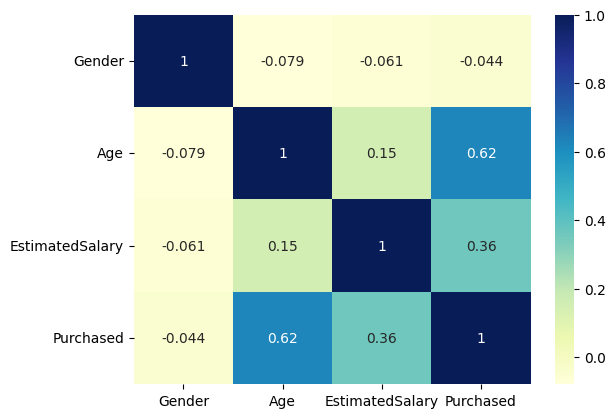

In [14]:
sns.heatmap(DF.corr(), annot=True, cmap="YlGnBu")

In [15]:
std = StandardScaler()
normal = MinMaxScaler()
DF_Standard = pd.DataFrame(std.fit_transform(DF.loc[:,["Age","EstimatedSalary"]]),columns=["Age","EstimatedSalary"])
DF_Normal = pd.DataFrame(normal.fit_transform(DF.loc[:,["Age","EstimatedSalary"]]),columns=["Age", "EstimatedSalary"])

In [16]:
DF_Standard

,Age,EstimatedSalary
0,-1.790107,-1.489380
1,-0.259429,-1.460047
2,0.027573,-0.785382
3,-1.790107,0.182616
4,-1.024768,-0.345383
...,...,...
394,0.792912,-0.844048
395,1.271249,-1.372047
396,1.175582,-1.460047
397,-0.163761,-1.078715


In [17]:
DF_Normal

,Age,EstimatedSalary
0,0.023810,0.029630
1,0.404762,0.037037
2,0.476190,0.207407
3,0.023810,0.451852
4,0.214286,0.318519
...,...,...
394,0.666667,0.192593
395,0.785714,0.059259
396,0.761905,0.037037
397,0.428571,0.133333


In [18]:
category = DF['Purchased'].values.reshape(-1,1) # Tiap category diubah menjadi list, sehingga list dalam list
encode = OneHotEncoder()
target = encode.fit_transform(category).toarray()

In [26]:
category = DF['Purchased'].values.reshape(-1,1) # Tiap category diubah menjadi list, sehingga list dalam list
encode = LabelEncoder()
target = encode.fit_transform(category)
target

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,

In [48]:
X_normal, Xtest_normal, y_normal, ytest_normal = train_test_split(DF_Normal,target,test_size=0.2, random_state=42) 

In [49]:
X_std, Xtest_std, y_std, ytest_std = train_test_split(DF_Standard,target,test_size=0.2, random_state=42) 

In [50]:
# DF Standart
logistic = LogisticRegression(random_state=42)
logistic.fit(X_std,y_std)

ypred_std = logistic.predict(Xtest_std)

In [53]:
accuracy = accuracy_score(ytest_std, ypred_std)
print(accuracy)

0.85


In [54]:
Xtest_std["Prediksi"] = ypred_std
Xtest_std["Realita"] = ytest_std

In [55]:
Xtest_std

,Age,EstimatedSalary,Prediksi,Realita
198,-0.259429,-1.401381,0,0
349,0.027573,1.267947,1,1
33,-1.024768,0.593282,0,0
208,0.792912,-1.401381,0,0
93,-0.833433,0.387949,0,0
...,...,...,...,...
249,0.601578,-0.902715,0,0
225,-0.163761,1.649280,1,1
368,1.558251,-1.284048,1,1
175,-0.259429,-0.668049,0,0


In [56]:
# DF Normal
logistic = LogisticRegression(random_state=42)
logistic.fit(X_normal,y_normal)

ypred_normal = logistic.predict(Xtest_normal)

In [57]:
accuracy = accuracy_score(ytest_normal, ypred_normal)
print(accuracy)

0.8


In [59]:
Xtest_normal["Prediksi"] = ypred_normal
Xtest_normal["Realita"] = ytest_normal
Xtest_normal

,Age,EstimatedSalary,Prediksi,Realita
198,0.404762,0.051852,0,0
349,0.476190,0.725926,0,1
33,0.214286,0.555556,0,0
208,0.666667,0.051852,0,0
93,0.261905,0.503704,0,0
...,...,...,...,...
249,0.619048,0.177778,0,0
225,0.428571,0.822222,0,1
368,0.857143,0.081481,1,1
175,0.404762,0.237037,0,0
